<a href="https://colab.research.google.com/github/PhabloAlves/Obstacles_identifier/blob/main/Algoritmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install plotly

In [ ]:
import os
import shutil
import pandas as pd
import glob
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
train_files = glob.glob('/content/drive/MyDrive/dataset_train/*')
len_train = len(train_files)
len_train

89

In [ ]:
path , dirs , files = next(os.walk('/content/drive/MyDrive/dataset_train'))
len_train = len(files)
len_train

87

In [ ]:
dirs

['com_obstaculos', 'sem_obstaculos']

In [ ]:
path

'/content/drive/MyDrive/dataset_train'

In [ ]:
files

['IMG_4457.JPG',
 'IMG_4456.JPG',
 'IMG_4448.JPG',
 'IMG_4452.JPG',
 'IMG_4454.JPG',
 'IMG_4449.JPG',
 'IMG_4453.JPG',
 'IMG_4450.JPG',
 'IMG_4451.JPG',
 'IMG_4455.JPG',
 'IMG_4447.JPG',
 'IMG_4439.JPG',
 'IMG_4442.JPG',
 'IMG_4445.JPG',
 'IMG_4441.JPG',
 'IMG_4438.JPG',
 'IMG_4444.JPG',
 'IMG_4440.JPG',
 'IMG_4446.JPG',
 'IMG_4435.JPG',
 'IMG_4433.JPG',
 'IMG_4437.JPG',
 'IMG_4434.JPG',
 'IMG_4436.JPG',
 'IMG_4429.JPG',
 'IMG_4428.JPG',
 'IMG_4432.JPG',
 'IMG_4431.JPG',
 'IMG_4430.JPG',
 'IMG_4423.JPG',
 'IMG_4426.JPG',
 'IMG_4425.JPG',
 'IMG_4427.JPG',
 'IMG_4424.JPG',
 'IMG_4420.JPG',
 'IMG_4421.JPG',
 'IMG_4419.JPG',
 'IMG_4422.JPG',
 'IMG_4443.JPG',
 'IMG_4416.JPG',
 'IMG_4413.JPG',
 'IMG_4418.JPG',
 'IMG_4415.JPG',
 'IMG_4417.JPG',
 'IMG_4410.JPG',
 'IMG_4412.JPG',
 'IMG_4408.JPG',
 'IMG_4411.JPG',
 'IMG_4409.JPG',
 'IMG_4401.JPG',
 'IMG_4400.JPG',
 'IMG_4406.JPG',
 'IMG_4403.JPG',
 'IMG_4398.JPG',
 'IMG_4404.JPG',
 'IMG_4402.JPG',
 'IMG_4399.JPG',
 'IMG_4405.JPG',
 'IMG_4407.JPG

In [ ]:
test_files = glob.glob('/content/drive/MyDrive/dataset_test/*')
len_test = len(test_files)
len_test

8

In [ ]:
data_train = {}

data_train['Sem Obstáculos'] = glob.glob('/content/drive/MyDrive/dataset_train/sem_obstaculos/*')
data_train['Com Obstáculos'] = glob.glob('/content/drive/MyDrive/dataset_train/com_obstaculos/*')

print(f"count of Sem Obstáculos train data :  {len(data_train['Sem Obstáculos'])}")
print(f"count of Com Obstáculos data :  {len(data_train['Com Obstáculos'])}")

count of Sem Obstáculos train data :  46
count of Com Obstáculos data :  41


In [ ]:
data_train

{'Sem Obstáculos': ['/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4418.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4416.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4417.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4415.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4413.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4408.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4411.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4412.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4410.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4409.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4406.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4402.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4404.JPG',
  '/content/drive/MyDrive/dataset_train/sem_obstaculos/IMG_4405.JPG',
  

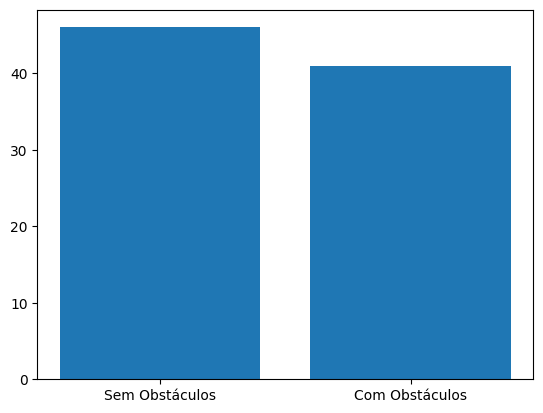

In [ ]:
x = data_train.keys()
y = [len(count) for count in data_train.values()]

plt.bar(x,y);

In [ ]:
def get_dims (img):
    image = cv2.imread(img)
    h, w, d = image.shape
    return h, w , d

In [ ]:
df = pd.DataFrame(columns = ['Height',
                            'Width',
                            'Channels',
                            'Class'])
for img in files:
    h, w, d = get_dims(path+'/'+img)
    df.loc[len(df)] = [h , w , d, img.split('.')[0]]

df

,Height,Width,Channels,Class
0,4032,3024,3,IMG_4457
1,4032,3024,3,IMG_4456
2,4032,3024,3,IMG_4448
3,4032,3024,3,IMG_4452
4,4032,3024,3,IMG_4454
...,...,...,...,...
82,4032,3024,3,IMG_4370
83,4032,3024,3,IMG_4367
84,4032,3024,3,IMG_4369
85,4032,3024,3,IMG_4368


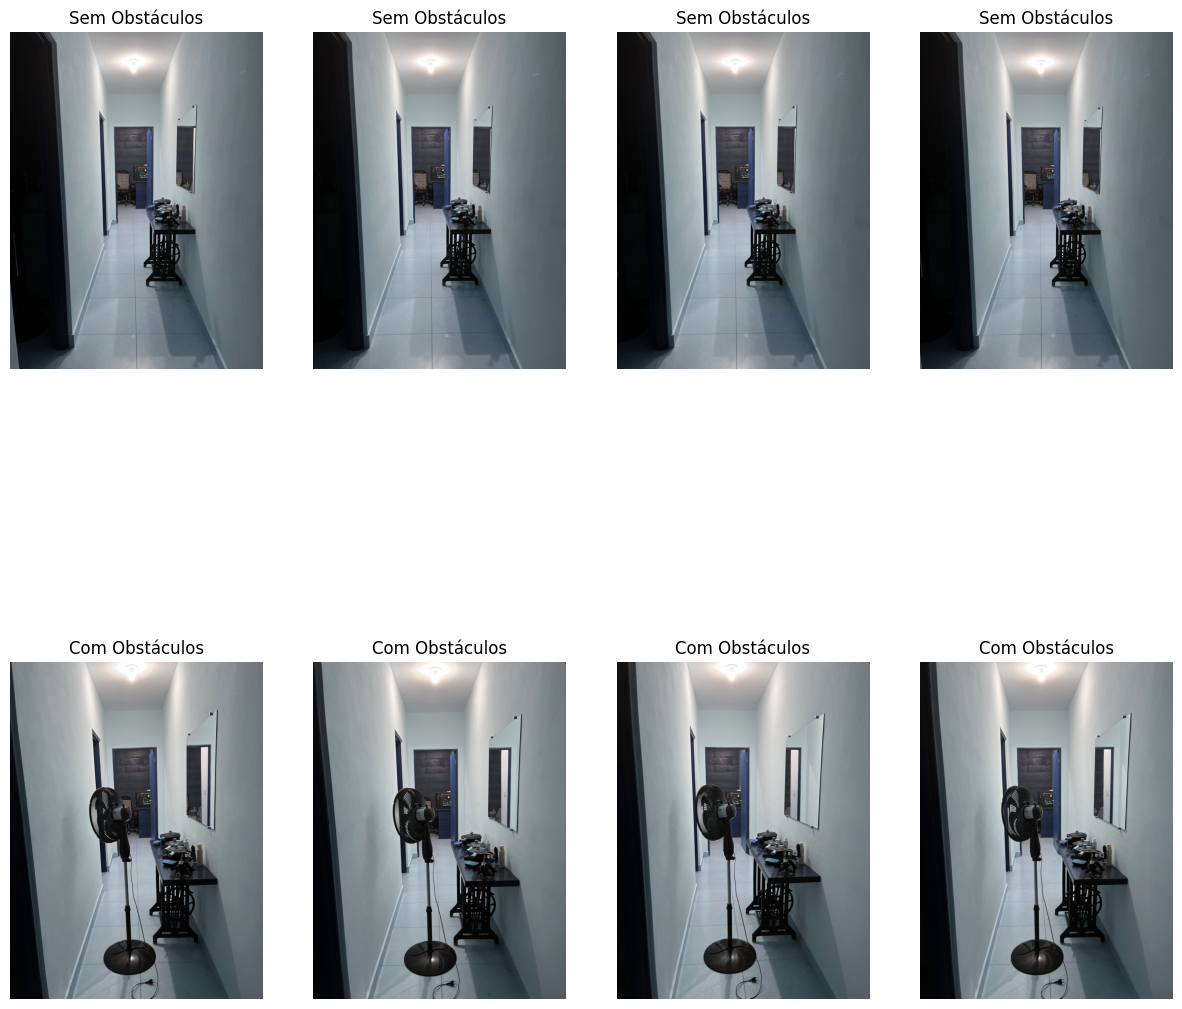

In [ ]:
count = 0
plt.figure(figsize= (15,15))
for label in data_train.keys():
    for path in data_train[label]:
        sp = plt.subplot(2 , 4 , count+1)
        sp.set_title(label)
        image = cv2.imread(path)
        plt.axis('off')
        plt.imshow(image)
        count+=1
        if count % 4 == 0:
            break
plt.show()

In [ ]:
base_dir = '/content/drive/MyDrive/test_dataset'


train_dir = os.path.join(base_dir , 'train')


valid_dir= os.path.join(base_dir , 'validation')


test_dir = os.path.join(base_dir , 'test')


train_no_obstacles_dir = os.path.join(train_dir , 'no_obstacles')


train_with_obstacles_dir = os.path.join(train_dir , 'with_obstacles')


valid_no_obstacles_dir = os.path.join(valid_dir, 'no_obstacles')


valid_with_obstacles_dir = os.path.join(valid_dir , 'with_obstacles')

test_no_obstacles_dir = os.path.join(test_dir , 'no_obstacles')

test_with_obstacles_dir = os.path.join(test_dir , 'with_obstacles')

In [ ]:
print(f'Total training no_obstacles images {len(os.listdir(train_no_obstacles_dir))}')
print(f'Total validation no_obstacles images {len(os.listdir(valid_no_obstacles_dir))}')
print(f'Total test no_obstacles images {len(os.listdir(test_no_obstacles_dir))}')
print('\n')
print(f'Total training with_obstacles images {len(os.listdir(train_with_obstacles_dir))}')
print(f'Total validation with_obstacles images {len(os.listdir(valid_with_obstacles_dir))}')
print(f'Total test with_obstacles images {len(os.listdir(test_with_obstacles_dir))}')

Total training no_obstacles images 48
Total validation no_obstacles images 12
Total test no_obstacles images 15


Total training with_obstacles images 39
Total validation with_obstacles images 15
Total test with_obstacles images 15


In [ ]:
import random
from PIL import Image, ImageFilter, ImageDraw
import os


def apply_random_filter(image):
    filter_type = random.choice(['Fog', 'Rain', 'Snow'])
    if filter_type == 'Fog':

        image = image.filter(ImageFilter.GaussianBlur(radius=5))
    elif filter_type == 'Rain':

        width, height = image.size
        draw = ImageDraw.Draw(image)
        raindrop_count = int(width * height * 0.01)

        for _ in range(raindrop_count):
            x = random.randint(0, width)
            y = random.randint(0, height)
            length = random.randint(5, 15)
            draw.line([(x, y), (x, y + length)], fill=(200, 200, 200), width=1)

    elif filter_type == 'Snow':
        # Apply snow filter
        image = image.convert("RGBA")
        width, height = image.size
        snowflake_count = int(width * height * 0.01)

        snowflake = Image.new('RGBA', (4, 4), (255, 255, 255, 255))

        for _ in range(snowflake_count):
            x = random.randint(0, width)
            y = random.randint(0, height)
            image.alpha_composite(snowflake, dest=(x, y))

    return image

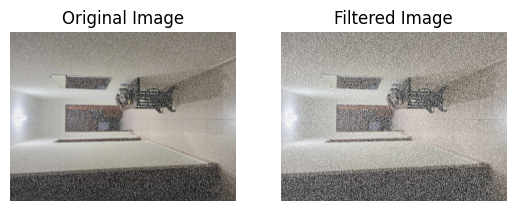

In [ ]:
image = Image.open('/content/drive/MyDrive/test_dataset/train/no_obstacles/IMG_4366.JPG')


filtered_image = apply_random_filter(image)


plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.axis('off')

plt.show()

In [ ]:
train_no_obstacles_dir = '/content/drive/MyDrive/test_dataset/train/no_obstacles'
train_with_obstacles_dir = '/content/drive/MyDrive/test_dataset/train/with_obstacles'


num_images_to_filter = 30

no_obstacles_image_files = os.listdir(train_no_obstacles_dir)
random_no_obstacles_images = random.sample(no_obstacles_image_files, num_images_to_filter)

for fname in random_no_obstacles_images:
    image_path = os.path.join(train_no_obstacles_dir, fname)
    image = Image.open(image_path)
    image = apply_random_filter(image)
    image = image.convert("RGB")
    image.save(image_path)


with_obstacles_image_files = os.listdir(train_with_obstacles_dir)
random_with_obstacles_images = random.sample(with_obstacles_image_files, num_images_to_filter)

for fname in random_with_obstacles_images:
    image_path = os.path.join(train_with_obstacles_dir, fname)
    image = Image.open(image_path)
    image = apply_random_filter(image)
    image = image.convert("RGB")
    image.save(image_path)

In [ ]:
import os
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model_conv = VGG16(weights='imagenet', input_shape=(250, 250, 3), include_top=False)

In [ ]:
model_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [ ]:
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.1,
    zoom_range=0.3,
)
generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/test_dataset/train',
    target_size=(250, 250),
    batch_size=20,
    class_mode='binary'
)

Found 87 images belonging to 2 classes.


In [ ]:
data_generator_test = ImageDataGenerator(
    rescale=1.0/255.0,
)
generator_valid = data_generator_test.flow_from_directory(
    '/content/drive/MyDrive/test_dataset/validation',
    target_size=(250, 250),
    batch_size=10,
    class_mode='binary'
)

Found 27 images belonging to 2 classes.


In [ ]:
generator_test = data_generator_test.flow_from_directory(
    '/content/drive/MyDrive/test_dataset/test',
    target_size=(250, 250),
    batch_size=10,
    class_mode='binary'
)

Found 30 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import models, layers, optimizers

In [ ]:
model_conv.trainable = False

In [ ]:
model = models.Sequential()
model.add(model_conv)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', patience=7)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)
mch = ModelCheckpoint('model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
history = model.fit(generator, steps_per_epoch=len(generator), epochs=20, validation_data=generator_valid, validation_steps=len(generator_valid), callbacks=[es, rlrop, mch])

Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 2.3683 - accuracy: 0.5057 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 102s 19s/step - loss: 2.3683 - accuracy: 0.5057 - val_loss: 0.8050 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 2/20
5/5 [==============================] - 91s 18s/step - loss: 1.4394 - accuracy: 0.6552 - val_loss: 0.3873 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 3/20
5/5 [==============================] - 112s 23s/step - loss: 0.7541 - accuracy: 0.7931 - val_loss: 1.2754e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
5/5 [==============================] - 95s 19s/step - loss: 0.5126 - accuracy: 0.8966 - val_loss: 6.1840e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/20
5/5 [==============================] - 111s 25s/step - loss: 0.1302 - accuracy: 0.9425 - val_loss: 0.0262 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/20
5/5 [==============================] - 115s 23s/step - loss: 0.2554 - accuracy: 0.9195 - val_loss: 4.0178e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/20
5/5 [==============================] - 111s 23s/step - loss: 0.0325 - ac

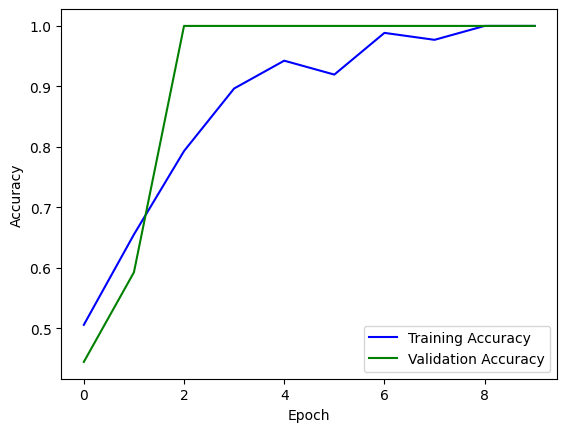

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.plot(history.history['accuracy'], color='blue', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color='green' , label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

Best Validation Accuracy: 1.0


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


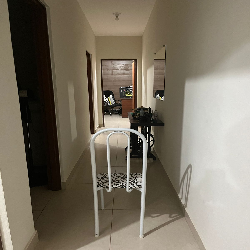

In [ ]:
import tensorflow.keras.utils as utils
img = utils.load_img(
    '/content/drive/MyDrive/test_dataset/test/corredor06.jpeg',
    grayscale=False,
    color_mode='rgb',
    target_size=(250, 250),
    interpolation='nearest',
    keep_aspect_ratio=False,
)
# corredor 01 img = img.rotate(270, expand=True)
#corredor 02 img = img.rotate(0, expand=True)
#corredor 03 img = img.rotate(0, expand=True)
#corredor 04 img = img.rotate(0, expand=True)
#corredor 05 img = img.rotate(270, expand=True)
#corredor 06
img = img.rotate(0, expand=True)

img

In [ ]:
img = utils.img_to_array(img)
img.shape

(250, 250, 3)

In [ ]:
result = model.predict(tf.expand_dims(img, axis=0))
result

1/1 [==============================] - 1s 590ms/step


array([[0.9999975]], dtype=float32)

In [ ]:
if float(result) < 0.5:
    print('Sem obstáculo')
else:
    print('Com obstáculo')

Com obstáculo
